In [1]:
# use numpy and pandas
import numpy as np
import pandas as pd

# We need sklearn for preprocessing and for the TSNE Algorithm.
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

# WE employ a random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


In [2]:
data = pd.read_csv("Dataset/dataset_no_outlier.csv")
data.head()

,X,Y,Z,Mixed,ClassLabel
0,0.125022,0.094986,0.001297,0.157018,1.0
1,0.150710,0.083282,-0.023514,0.173788,1.0
2,0.102941,0.111084,0.010075,0.151782,1.0
3,0.038450,0.049911,0.007511,0.063451,1.0
4,-0.029148,-0.105423,0.017124,0.110711,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4879 entries, 0 to 4878
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           4879 non-null   float64
 1   Y           4879 non-null   float64
 2   Z           4879 non-null   float64
 3   Mixed       4879 non-null   float64
 4   ClassLabel  4879 non-null   float64
dtypes: float64(5)
memory usage: 190.7 KB


In [4]:
data.describe().round(3)

,X,Y,Z,Mixed,ClassLabel
count,4879.000,4879.000,4879.000,4879.000,4879.000
mean,0.001,0.008,-0.004,0.249,3.019
std,0.155,0.240,0.132,0.193,1.415
min,-0.796,-0.983,-0.623,0.005,1.000
25%,-0.070,-0.103,-0.064,0.099,2.000
50%,-0.002,0.008,-0.003,0.203,3.000
75%,0.072,0.125,0.051,0.347,4.000
max,0.868,0.939,0.962,0.996,5.000


(array([635., 625., 598., 591., 487., 433., 330., 278., 197., 174., 114.,
        102.,  70.,  66.,  60.,  33.,  28.,  20.,  17.,  21.]),
 array([0.00489574, 0.05442978, 0.10396382, 0.15349787, 0.20303191,
        0.25256595, 0.3021    , 0.35163404, 0.40116808, 0.45070213,
        0.50023617, 0.54977021, 0.59930426, 0.6488383 , 0.69837234,
        0.74790638, 0.79744043, 0.84697447, 0.89650851, 0.94604256,
        0.9955766 ]),
 <BarContainer object of 20 artists>)

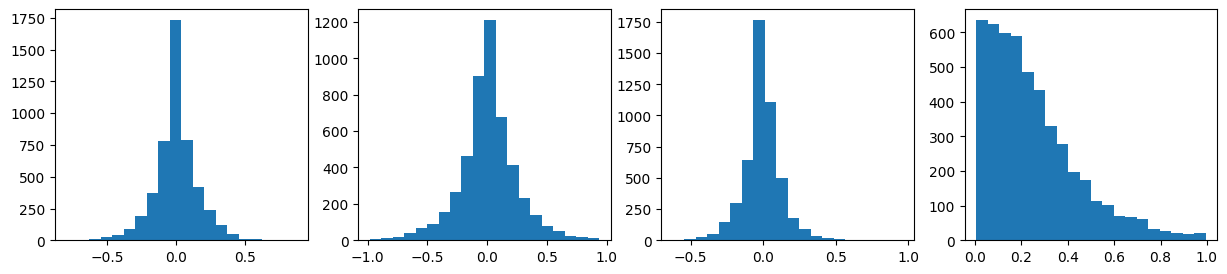

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
X = np.array(data)
Y = X[:,-1]
axs[0].hist(X[:,0], bins = 20)
axs[1].hist(X[:,1], bins = 20)
axs[2].hist(X[:,2], bins = 20)
axs[3].hist(X[:,3], bins = 20)

In [6]:
X1 = data.iloc[:, 0:4]
X2 = data.iloc[:, 0:4]

In [7]:
std_scalar = StandardScaler()
std_scalar.fit_transform(X1)
X1.head()

,X,Y,Z,Mixed
0,0.125022,0.094986,0.001297,0.157018
1,0.150710,0.083282,-0.023514,0.173788
2,0.102941,0.111084,0.010075,0.151782
3,0.038450,0.049911,0.007511,0.063451
4,-0.029148,-0.105423,0.017124,0.110711


In [8]:
X1.describe().round(3)

,X,Y,Z,Mixed
count,4879.000,4879.000,4879.000,4879.000
mean,0.001,0.008,-0.004,0.249
std,0.155,0.240,0.132,0.193
min,-0.796,-0.983,-0.623,0.005
25%,-0.070,-0.103,-0.064,0.099
50%,-0.002,0.008,-0.003,0.203
75%,0.072,0.125,0.051,0.347
max,0.868,0.939,0.962,0.996


(array([635., 625., 598., 591., 487., 433., 330., 278., 197., 174., 114.,
        102.,  70.,  66.,  60.,  33.,  28.,  20.,  17.,  21.]),
 array([0.00489574, 0.05442978, 0.10396382, 0.15349787, 0.20303191,
        0.25256595, 0.3021    , 0.35163404, 0.40116808, 0.45070213,
        0.50023617, 0.54977021, 0.59930426, 0.6488383 , 0.69837234,
        0.74790638, 0.79744043, 0.84697447, 0.89650851, 0.94604256,
        0.9955766 ]),
 <BarContainer object of 20 artists>)

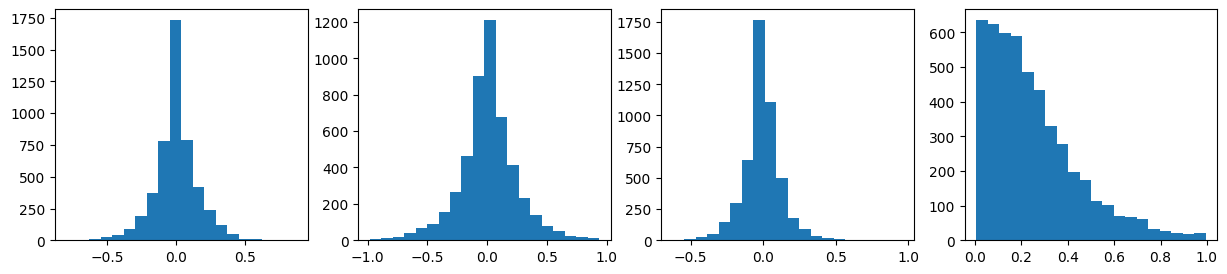

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
X1 = np.array(X1)
axs[0].hist(X1[:,0], bins = 20)
axs[1].hist(X1[:,1], bins = 20)
axs[2].hist(X1[:,2], bins = 20)
axs[3].hist(X1[:,3], bins = 20)

In [10]:
stdNorm = MinMaxScaler(feature_range=(0,1))
stdNorm.fit_transform(X2)
X2.head()

,X,Y,Z,Mixed
0,0.125022,0.094986,0.001297,0.157018
1,0.150710,0.083282,-0.023514,0.173788
2,0.102941,0.111084,0.010075,0.151782
3,0.038450,0.049911,0.007511,0.063451
4,-0.029148,-0.105423,0.017124,0.110711


In [11]:
X2.describe().round(3)

,X,Y,Z,Mixed
count,4879.000,4879.000,4879.000,4879.000
mean,0.001,0.008,-0.004,0.249
std,0.155,0.240,0.132,0.193
min,-0.796,-0.983,-0.623,0.005
25%,-0.070,-0.103,-0.064,0.099
50%,-0.002,0.008,-0.003,0.203
75%,0.072,0.125,0.051,0.347
max,0.868,0.939,0.962,0.996


(array([635., 625., 598., 591., 487., 433., 330., 278., 197., 174., 114.,
        102.,  70.,  66.,  60.,  33.,  28.,  20.,  17.,  21.]),
 array([0.00489574, 0.05442978, 0.10396382, 0.15349787, 0.20303191,
        0.25256595, 0.3021    , 0.35163404, 0.40116808, 0.45070213,
        0.50023617, 0.54977021, 0.59930426, 0.6488383 , 0.69837234,
        0.74790638, 0.79744043, 0.84697447, 0.89650851, 0.94604256,
        0.9955766 ]),
 <BarContainer object of 20 artists>)

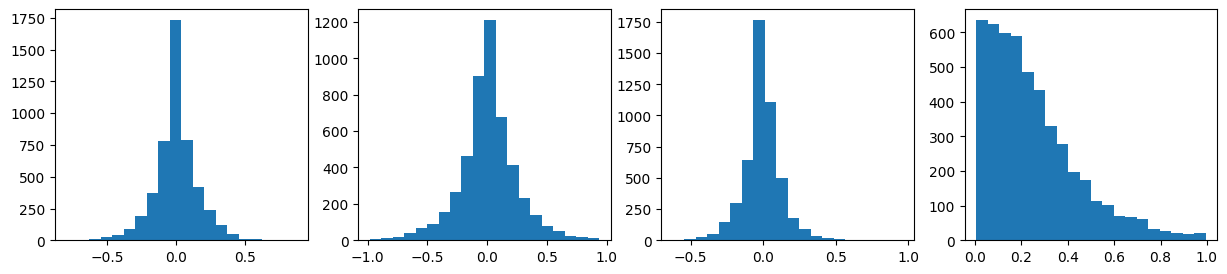

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
X2 = np.array(X2)
axs[0].hist(X2[:,0], bins = 20)
axs[1].hist(X2[:,1], bins = 20)
axs[2].hist(X2[:,2], bins = 20)
axs[3].hist(X2[:,3], bins = 20)

(array([ 974.,  932.,  987., 1001.,  985.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <BarContainer object of 5 artists>)

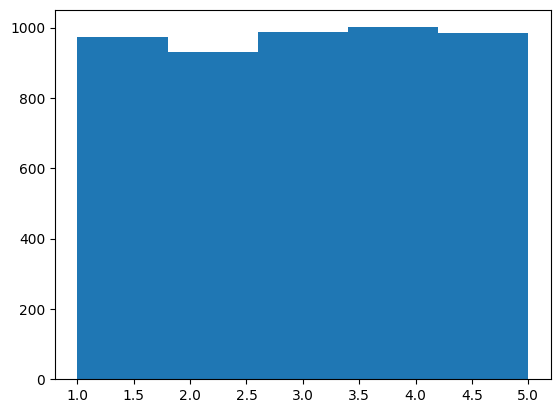

In [13]:
plt.hist(X[:,4], bins=5)

In [14]:
from scipy.stats import entropy
from scipy.signal import find_peaks

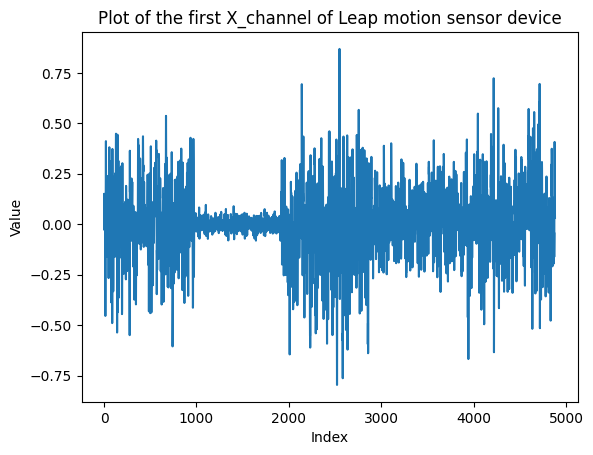

In [15]:
x_values = np.linspace(0, X.shape[0], num=X.shape[0])

# Plot the first column of X against the generated x_values
plt.plot(x_values, X[:,0])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of the first X_channel of Leap motion sensor device')
plt.show()

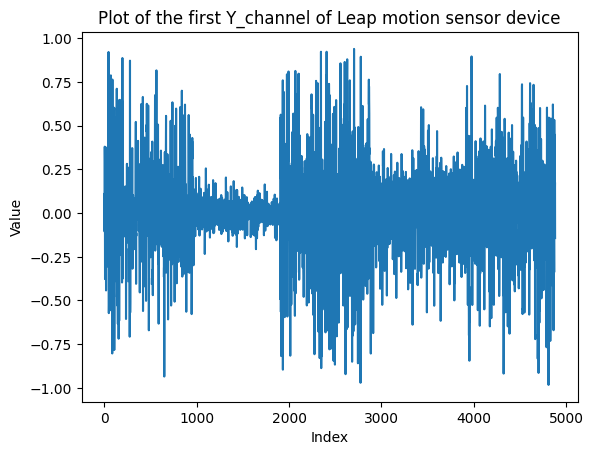

In [16]:
plt.plot(x_values, X[:,1])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of the first Y_channel of Leap motion sensor device')
plt.show()

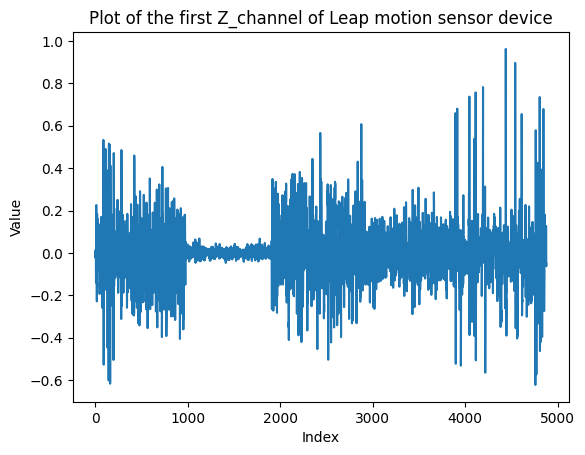

In [17]:
plt.plot(x_values, X[:,2])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of the first Z_channel of Leap motion sensor device')
plt.show()

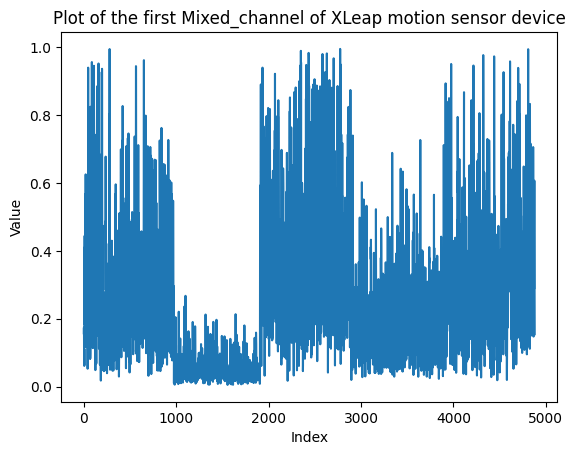

In [18]:
plt.plot(x_values, X[:,3])
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of the first Mixed_channel of XLeap motion sensor device')
plt.show()